In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (430, 800, 3)


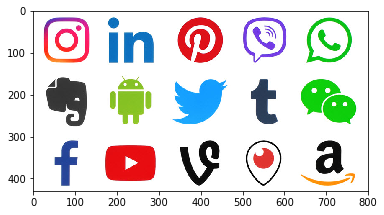

In [5]:
image = cv2.imread(r'C:\Users\ihrishi\Desktop\logo-color_image.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [6]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [7]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [8]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

[array([254.33203813, 254.39477432, 254.28698066]),
 array([38.01717755, 41.37546276, 46.253591  ]),
 array([230.67583643,  30.43109159,  34.44494762]),
 array([ 22.84924521, 143.38178295, 228.6500408 ]),
 array([ 15.41250154, 203.07785828,  17.05538499]),
 array([ 93.35276292,  73.04010695, 179.85062389]),
 array([137.90884439, 194.78598248,  45.69107217]),
 array([197.04181673, 185.88535414, 184.95658263])]

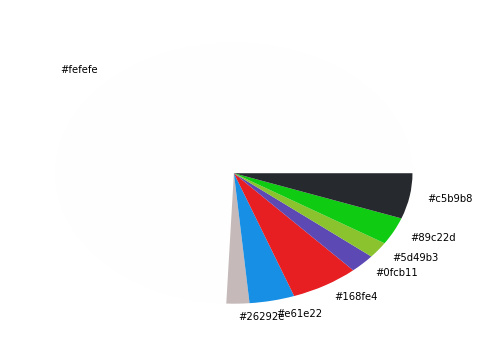

In [11]:
img='C:\\Users\ihrishi\Desktop\logo-color_image.jpg'
get_colors(get_image(img), 8, True)